## Aprendizaje automático, 2024-2025

## Práctica 2, Clustering

### Introducción

En esta práctica vas a programar el algoritmo de clustering K-Means y el algoritmo EM para una mezcla de gausianas. Compararás tu implementación con la de scikit-learn. El material de la práctica incluye:

- El fichero ``aa_p2.py``, en el que deberás completar el código de las clases ``KMeans`` y ``GMM``.

- Este notebook, ``aa_p2.ipynb``, en el que se describen los ejercicios y se incluyen algunos tests para tu código. El notebook importa algunas clases y funciones del fichero ``aa_p2.py``, por lo que este último deberá estar accesible en el *import path*.



### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import aa_p2 as aa_p2

# Para normalizar en KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Algoritmo K-Means

Completa, en el fichero ``aa_p2.py``, el código de la clase ``KMeans``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo K-Means para ajustar ``self.num_clusters`` clusters a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros de los clusters se almacenarán en la lista ``self.centers``.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n,)`` con el índice del cluster al que pertenece cada punto. El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

- ``get_centers(self)``: Devuelve los centros de los clusters como una lista de arrays de numpy, cada uno de dimensiones ``(d,)``.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con los siguientes tests (no exhaustivos).

In [2]:
importlib.reload(aa_p2)
from aa_p2 import KMeans, plotModel

Carga de datos (Iris):

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
t = iris.target

Ejecución del algoritmo:

In [4]:
km = KMeans(3, 10, random_state=123)
x = StandardScaler().fit_transform(x)
km.fit(x)
y = km.predict(x)
c = km.get_centers()

Visualización de los resultados:

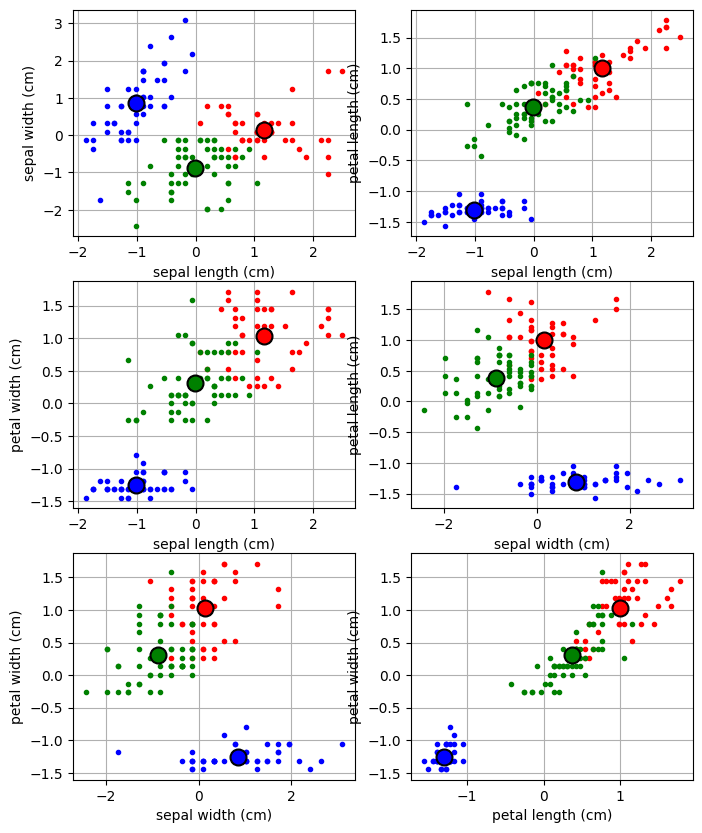

In [5]:
plt.figure(figsize=(8,10))
n_classes = 3

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    xplot = x[:, pair]

    plt.subplot(3, 2, pairidx + 1)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.grid(True)

    plotModel(xplot, y, "", centers=c[:, pair])

plt.show()

Creación de datos (make_blobs):

In [6]:
from sklearn.datasets import make_blobs
x, t = make_blobs(n_samples=500, n_features=2, centers=5, shuffle=True, random_state=15)

Ejecución del algoritmo y visualización de resultados:

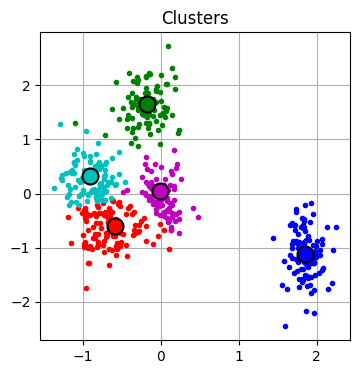

In [7]:
km = KMeans(5, 10, random_state=125)
x = StandardScaler().fit_transform(x)
km.fit(x)
y = km.predict(x)
c = km.get_centers()
plotModel(x, y, "Clusters", centers=c, new_figure=True)

### Pruebas del código y comparación con scikit-learn

Las pruebas anteriores son sólo una guía y no pretenden ser exhaustivas. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.cluster.KMeans](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

In [ ]:
# Incluye aquí las celdas de código y texto necesarias para tus pruebas...

### Algoritmo EM para una mezcla de gausianas

Completa, en el fichero ``aa_p2.py``, el código de la clase ``GMM``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo EM para ajustar una mezcla de ``self.num_components`` componentes gausianas a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros, covarianzas y prioris de cada componente se almacenarán en las listas ``self.centers``, ``self.covariances`` y ``self.weights``, respectivamente.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n, self.num_components)`` con las probabilidades de pertenencia de cada punto a cada una de las componentes (la suma por filas debe ser 1). El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con el siguiente test (no exhaustivo).

In [ ]:
importlib.reload(aa_p2)
from aa_p2 import GMM, plotModelGMM

Creación de datos (make_blobs):

In [ ]:
x, t = make_blobs(n_samples=400, n_features=2, centers=4, shuffle=True, random_state=21)

Ajuste a los datos de una mezcla de gausianas y visualización de los resultados:

In [ ]:
gmm = GMM(4, 100)
gmm.fit(x)
plotModelGMM(x, gmm, "GMM")

### Pruebas del código y comparación con scikit-learn

La prueba anterior es sólo una guía y no pretende ser exhaustiva. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

In [ ]:
# Incluye aquí las celdas de código y texto necesarias para tus pruebas...

### Entrega

La entrega incluirá:

- El fichero ``aa_p2.py`` con el código de las clases ``KMeans`` y ``GMM``.

- Este notebook con las pruebas que hayas diseñado para comprobar la corrección de tu código, así como las comparaciones con ``KMeans`` y ``GaussianMixture`` de scikit-learn y tus comentarios y conclusiones.

Ambos ficheros se incluirán en un fichero comprimido con nombre ``aa_p2.zip`` y se entregarán a través de Moodle antes de la fecha límite establecida.